In [2]:
#%load_ext autoreload
#%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch2.vector_drawing import *

# Drawing dino vectors

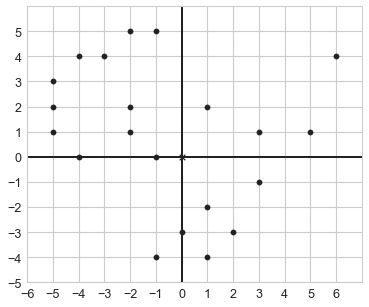

In [3]:

dino_vectors = [ (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1) ]
draw(Points(*dino_vectors))


## Connecting the points using hacky way

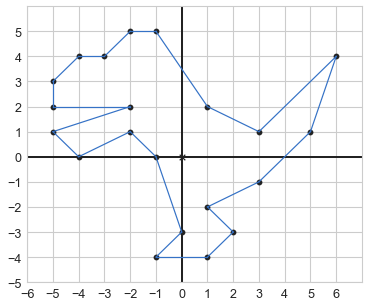

In [4]:
segments = []
for i in range(len(dino_vectors)):
    curr = dino_vectors[i]
    prev = dino_vectors[i - 1]
    segments.append( Segment(curr, prev) )

draw(
    Points(*dino_vectors),
    *segments
)

## Exercise 2.2
Draw the point in the plane and the arrow corresponding to the point (2, -2).

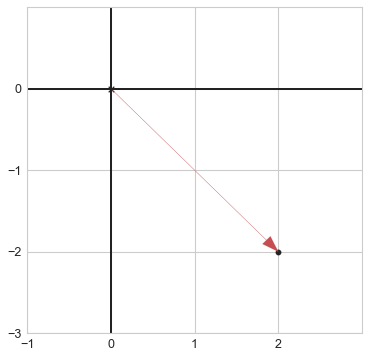

In [5]:
point = (2, -2)
draw(
    Points(point),
    Arrow(point, (0, 0))
)

## Exercise 2.2
Draw the dinosaur with the dots connected by constructing a Polygon object with the dino_vectors
as its vertices.

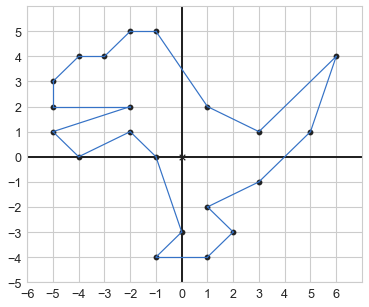

In [6]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**Exercise 2.5**: Draw the vectors (x,x**2) for x in the range from x = -10 to x = 11) as points (dots) using the draw
function. What is the result?

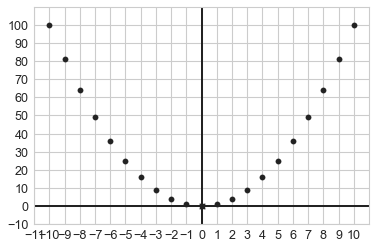

In [7]:
points = [(x, x ** 2)  for x in range(-10, 11)]
draw(Points(*points), grid= (1, 10), nice_aspect_ratio=False)

# 2.2

## Adding vectors

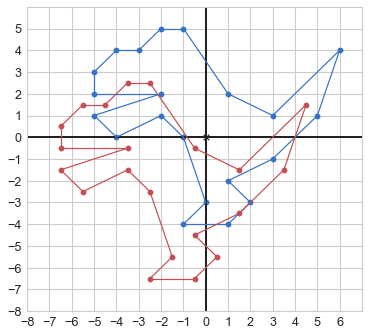

In [8]:
def add(v1, v2):
    return v1[0] + v2[0], v1[1] + v2[1]

dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

## Distances

In [9]:
from math import sqrt
def length(v):
    return sqrt( v[0]**2 + v[1]**2)

**Exercise 2.6**: If the vector u = (-2, 0), the vector v = (1.5, 1.5), and the
vector w = (4, 1), what are the results of u + v, v +
w, and u + w? What is the result of u + v + w?

In [10]:
u = (-2, 0)
v = (1.5, 1.5)
w = (4, 1)

uPlusV = add(u, v)
print(uPlusV)
vPlusW = add(v, w)
print(vPlusW)
uPlusW = add(u, w)
print(uPlusW)

uPlusVPlusW = add( add(u, v), w )
print(uPlusVPlusW)

(-0.5, 1.5)
(5.5, 2.5)
(2, 1)
(3.5, 2.5)


**Mini-project 2.7**: You can add any number of vectors together by summing all of their x-coordinates and all of their y-
coordinates. For instance, the fourfold sum (1, 2) + (2, 4) + (3, 6) + (4, 8) has x component 1 + 2 + 3 + 4 = 10 and y
component 2 + 4 + 6 + 8 = 20, making the result (10, 20). Implement a revised add function that takes any number of
vectors as arguments.

In [11]:
def add(*vectors):
    allX = [v[0] for v in vectors]
    allY = [v[1] for v in vectors]
    return sum(allX), sum(allY)

print(add(u, v, w))

(3.5, 2.5)


**Exercise 2.8:** Write a function translate(translation, vectors) that takes a translation vector and a list of
input vectors, and returns a list of the input vectors all translated by the translation vector. For instance,
translate((1,1), [(0,0), (0,1,), (-3,-3)]) should return [(1,1),(1,2),(-2,-2)].

In [12]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

print(translate((1,1), [(0,0), (0,1,), (-3,-3)]))

[(1, 1), (1, 2), (-2, -2)]


**Mini-project 2.11**: Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies
of the dinosaur.

100


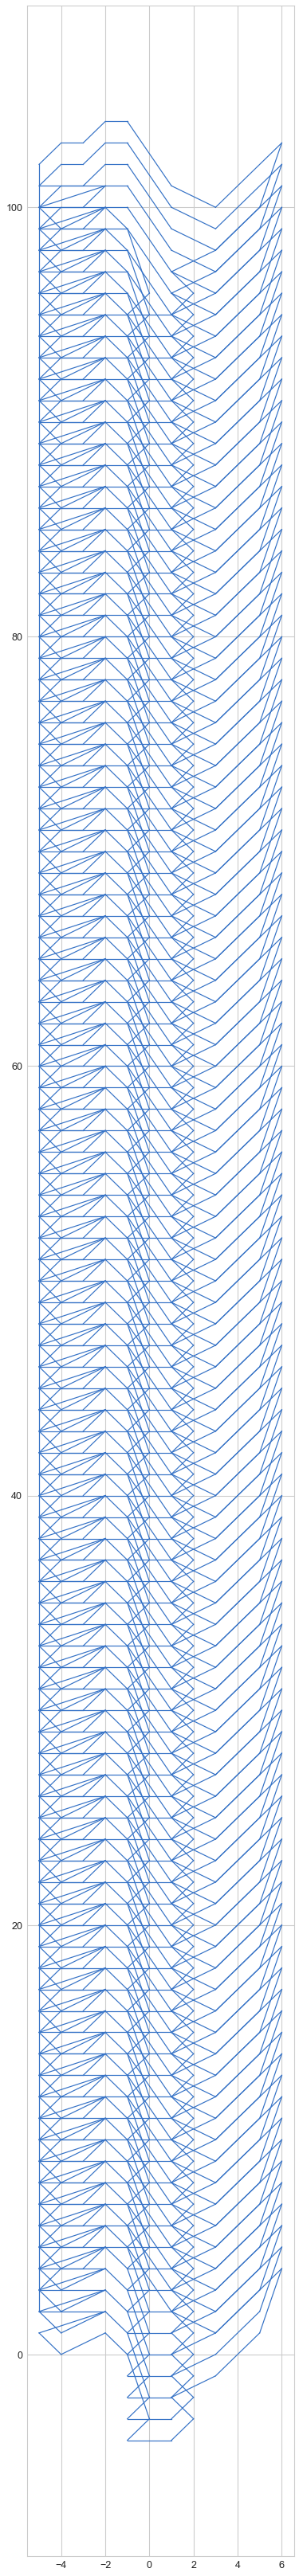

In [13]:
# These overlap, but whatever

copies = []
for i in range(0, 100):
    copies.append( translate((0, i), dino_vectors))

print(len(copies))
dinos = [Polygon(*points) for points in copies]
draw(*dinos, grid=None, axes=None, origin=None)

**Exercise 2.15**: What vector in the dino_vectors list has the longest length? Use the length function we wrote to
compute the answer quickly.

In [14]:
longestVec = max(dino_vectors, key=length)
print(longestVec)

(6, 4)


Exercise 2.16: Suppose a vector w has the coordinates (√2, √3). What are the approximate coordinates of the scalar
multiple π ∙ w? Draw an approximation of the original vector and the new vector

(1.4142135623730951, 1.7320508075688772)
(4.442882938158366, 5.441398092702653)


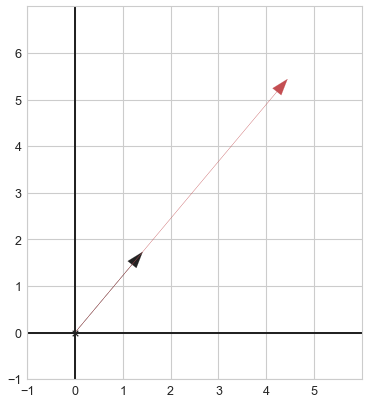

In [15]:
from math import pi
w = (sqrt(2), sqrt(3))
print(w)
scalar = (pi * w[0], pi * w[1])
print(scalar)
draw(Arrow(w, color = black), Arrow(scalar, color = red))

Exercise 2.17: Write a Python function scale(s,v) that multiplies the input vector v by the input scalar s.

In [16]:
def scale(s, v):
    return s * v[0], s * v[1]

Mini-project 2.19: Suppose u = (-1, 1) and v = (1, 1), and suppose r and s are real numbers. Specifically, let’s assume -1
< r < 1 and -3 < s < 3. Where are the possible points on the plane where the vector r ∙ u + s ∙ v could end up?

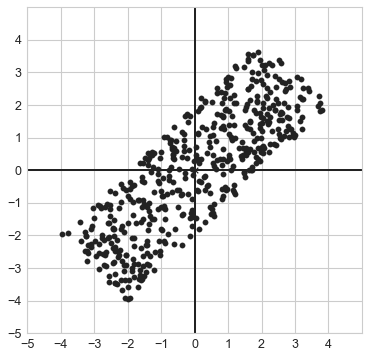

In [17]:
from random import uniform

u = (-1, 1)
v = (1, 1)

def rand_r():
    return uniform(-1, 1)

def rand_s():
    return uniform(-3, 3)


possiblePoints = []
for i in range(0, 500):
    r = rand_r()
    s = rand_s()
    rTimesU = scale(r, u)
    sTimesV = scale(s, v)
    possiblePoints.append( add(rTimesU, sTimesV) )

draw(Points(*possiblePoints))

#Results are different cuz fucking book has switched values of r and s

Exercise 2.24: Write a Python function subtract(v1,v2) that returns the result of v1 − v2, taking two 2D vectors
as inputs and returning a 2D vector as an output.

In [18]:
def subtract(v1, v2):
    return v1[0] - v2[0], v1[1] - v2[1]

print(subtract((-2, 0), (1.5, 1.5)))

(-3.5, -1.5)


Exercise 2.25: Write a Python function distance(v1,v2) that returns the distance between two input vectors.

In [19]:
def distance(v1, v2):
    displacement = subtract(v1, v2)
    return length(displacement)


Write another Python function perimeter(vectors) that takes a list of vectors as an argument and returns the sum
of distances from each vector to the next, including the distance from the last vector to the first. What is the perimeter
of the dinosaur defined by dino_vectors?

In [20]:
def perimeter(vectors):
    # Create a list of distances between each vector and its next:
    distances = [distance(vectors[i], vectors[i + 1]) for i in range(0, len(vectors) - 1)]
    distances.append( distance(vectors[-1], vectors[0]) )
    return sum(distances)

print(perimeter([(1,0),(1,1),(0,1),(0,0)]))
print(perimeter(dino_vectors))

4.0
44.77115093694563


Mini-project 2.26: Let u be the vector (1, -1). Suppose there is another vector v with positive integer coordinates (n, m)
such that n > m and has a distance of 13 from u. What is the displacement from u to v? (Hint: you can use Python to
search for the vector v.)

xMin: -12, xMax: 14, yMin: -14, yMax: 12
(13, 4)
displacement:  (-12, -5)


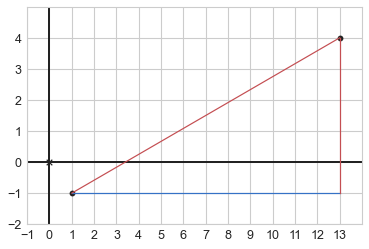

In [21]:
u = (1,-1) #Book has a typo, and says (1, 2) but solution uses (1, -1) so lets use that
distance2 = 13
xMin = 1 - distance2
xMax = 1 + distance2
yMin = -1 - distance2
yMax = -1 + distance2
print("xMin: %d, xMax: %d, yMin: %d, yMax: %d" % (xMin, xMax, yMin, yMax))

for n in range(xMin, xMax + 1):
    for m in range(yMin, yMax + 1):
        candidate = (n, m)
        foo = distance(candidate, u)
        if distance(u, candidate) == 13 and n > m > 0:
            print(candidate)
            print("displacement: ", subtract(u, candidate))

v = (13, 4) # Final result
# Plotting the points and creating a right triangle between them

triangleBase = (v[0], u[1]) #x = result x, y = original y
triangleHeight = (v[0], v[1]) # x & y = result
draw(
    Points(u, v, color = black),
    Segment(u, triangleBase, color = blue), # Base of right triangle,
    Segment(triangleBase, triangleHeight, color = orange), #Height of right triangle
    Segment(triangleHeight, u, color = red),
    grid = (1, 1), nice_aspect_ratio= False, width = 50
)

# 2.3 Trig

## to_cartesian

In [22]:
from math import tan, cos, sin
def to_cartesian(polar_vector):
    # noinspection PyShadowingNames
    length, angle = polar_vector[0], polar_vector[1]
    x = length * cos(angle)
    y = length * sin(angle)
    return x, y

angle = 37 * pi / 180
print(to_cartesian((5, angle)))

(3.993177550236464, 3.0090751157602416)


## to_polar


In [23]:
def to_polar(cartesian_vect):
    from math import atan2
    x, y = cartesian_vect[0], cartesian_vect[1]
    total_distance = length(cartesian_vect)
    angle = atan2(y, x)
    return total_distance, angle

print(to_polar((1, 0)))
print(to_polar((-2,3)))


(1.0, 0.0)
(3.605551275463989, 2.158798930342464)


Exercise 2.34: What is 116.57° in radians? Use Python to compute the tangent of this angle and confirm that it is close
to -2 as we saw previously.

In [24]:
radians = 116.57 * pi / 180
print(radians)
print(tan(radians))

2.03453030904979
-1.9995682083189954


Exercise 2.36: The following list comprehension creates 1,000 points in polar coordinates:
[(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
In Python code, convert these to Cartesian coordinates and connect them in a closed loop with line segments to draw a
picture.

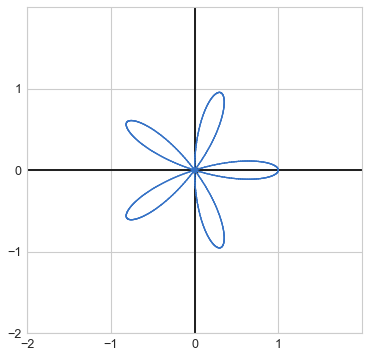

In [25]:
polar_vecs = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
carts = list(map(to_cartesian, polar_vecs))
draw(Polygon(*carts))

# 2.4 Transformations

Exercise 2.41: Create a rotate(angle, vectors) function that takes an array of input vectors in Cartesian
coordinates and rotates those by the specified angle (counterclockwise or clockwise, according to whether the angle is
positive or negative).

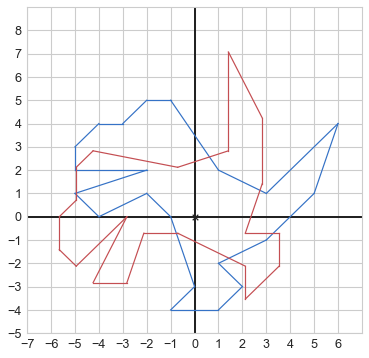

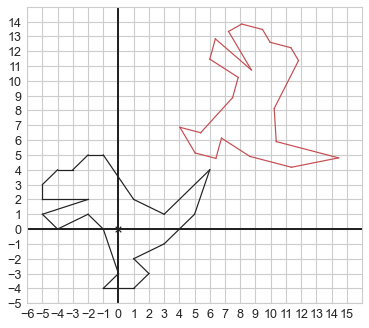

In [30]:
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    rotated = [(l, a + angle) for l, a in polars]
    return [to_cartesian(p) for p in rotated ]

draw(
    Polygon(*dino_vectors),
    Polygon(*rotate(pi / 4, dino_vectors), color = red)
)

new_dino = translate((8, 8), rotate(5 * pi / 3, dino_vectors))
draw(
    Polygon(*dino_vectors, color = black),
    Polygon(*new_dino, color = red)
)

Exercise 2.42: Create a function regular_polygon(n) that returns Cartesian coordinates for the vertices of a
regular n-sided polygon (that is, having all angles and side lengths equal).

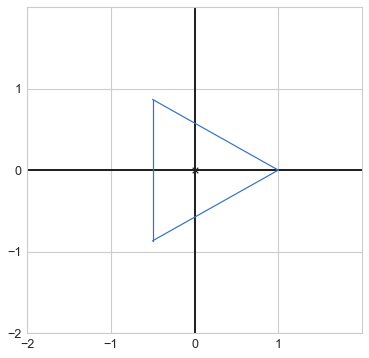

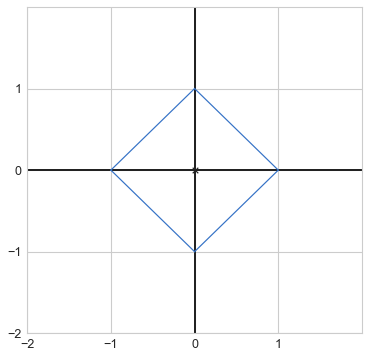

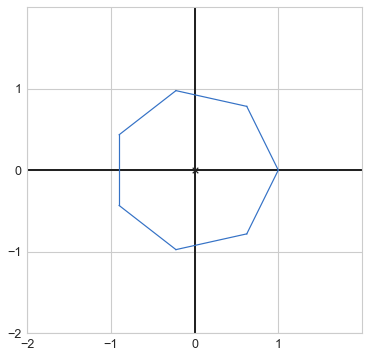

In [33]:
def regular_polygon(n):
    l = 1 # all sides have an equal distance from each other
    polar_vecs = []
    angle_delta = (2 * pi) / n
    last_angle = 0
    for i in range(0, n):
        angle = last_angle + angle_delta
        polar_vecs.append( (l, angle) )
        last_angle = angle

    #print(polar_vecs)
    return [to_cartesian(p) for p in polar_vecs]

draw(
    Polygon(*regular_polygon(3))
)

draw(
    Polygon(*regular_polygon(4))
)


draw(
    Polygon(*regular_polygon(7))
)